In [21]:
! pip install matplotlib

     |████████████████████████████████| 13.2MB 8.2MB/s eta 0:00:01
     |████████████████████████████████| 122kB 9.9MB/s eta 0:00:01


In [1]:
import pandas as pd
import os

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [2]:
df = pd.read_json(os.path.join('..', 'input', 'sample_analysis.json'))
df.head()

,track,features,analysis
0,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.559, 'energy': 0.33, 'key':...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
1,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.874, 'energy': 0.6920000000...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
2,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.759, 'energy': 0.548, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
3,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.861, 'energy': 0.603, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
4,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.777, 'energy': 0.782, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."


In [3]:
song_data = dict(df['track'][0])
song_data.keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [4]:
sample_analysis = df['analysis'][0]
def segment_to_vector(segment):
    return [segment['duration'], segment['loudness_start'], segment['loudness_max_time'], segment['loudness_max']]\
        + segment['pitches'] + segment['timbre']

arr = list(map(segment_to_vector, sample_analysis['segments']))

In [5]:
import numpy as np

In [6]:
arr = np.array(arr)
arr

array([[ 4.53510e-01, -6.00000e+01,  3.97630e-01, ...,  1.37200e+00,
        -1.10940e+01, -7.22400e+00],
       [ 9.75100e-02, -5.89210e+01,  3.68500e-02, ...,  3.61520e+01,
        -5.14400e+00, -2.58000e-01],
       [ 2.55420e-01, -5.17890e+01,  5.41200e-02, ...,  6.87900e+00,
         4.09000e+01,  1.32320e+01],
       ...,
       [ 4.33380e-01, -4.13420e+01,  5.72300e-02, ..., -2.41300e+00,
        -8.63100e+00, -1.79360e+01],
       [ 6.56640e-01, -4.17450e+01,  3.74600e-02, ..., -1.35300e+00,
        -2.93200e+00, -2.54780e+01],
       [ 8.28717e+00, -4.09070e+01,  5.68300e-02, ..., -1.29300e+01,
        -9.04200e+00, -1.52650e+01]])

In [9]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [10]:
n_steps = 5
X, y = split_sequences(arr, n_steps)

In [11]:
print(X.shape, y.shape)

(842, 3, 28) (842, 28)


In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


In [13]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=X.shape[1:]))
model.add(LSTM(100, activation='relu'))
model.add(Dense(X.shape[-1]))
model.compile(optimizer='adam', loss='mse')

In [14]:
model.fit(X, y, epochs=400, verbose=1)




Epoch 1/400





842/842 [==============================] - 8s 10ms/step - loss: 520.4378
Epoch 2/400
842/842 [==============================] - 1s 1ms/step - loss: 333.0575
Epoch 3/400
842/842 [==============================] - 1s 1ms/step - loss: 294.1129
Epoch 4/400
842/842 [==============================] - 1s 1ms/step - loss: 268.4747
Epoch 5/400
842/842 [==============================] - 1s 1ms/step - loss: 244.1296
Epoch 6/400
842/842 [==============================] - 1s 1ms/step - loss: 220.2524
Epoch 7/400
842/842 [==============================] - 1s 1ms/step - loss: 197.3029
Epoch 8/400
842/842 [==============================] - 1s 1ms/step - loss: 176.8929
Epoch 9/400
842/842 [==============================] - 1s 1ms/step - loss: 161.7677
Epoch 10/400
842/842 [==============================] - 1s 1ms/step - loss: 140.5670
Epoch 11/400
842/842 [==============================] - 1s 1ms/step - loss: 124.4874
Epoch 12/400
842/842 [==============================] - 1s 1ms/st

842/842 [==============================] - 1s 2ms/step - loss: 4.7865
Epoch 78/400
842/842 [==============================] - 1s 2ms/step - loss: 4.5898
Epoch 79/400
842/842 [==============================] - 1s 2ms/step - loss: 4.5379
Epoch 80/400
842/842 [==============================] - 2s 2ms/step - loss: 4.8723
Epoch 81/400
842/842 [==============================] - 2s 2ms/step - loss: 4.8418
Epoch 82/400
842/842 [==============================] - 2s 2ms/step - loss: 4.8293
Epoch 83/400
842/842 [==============================] - 2s 2ms/step - loss: 4.9944
Epoch 84/400
842/842 [==============================] - 2s 2ms/step - loss: 5.0576
Epoch 85/400
842/842 [==============================] - 2s 2ms/step - loss: 5.1987
Epoch 86/400
842/842 [==============================] - 1s 2ms/step - loss: 5.1686
Epoch 87/400
842/842 [==============================] - 2s 2ms/step - loss: 5.2537
Epoch 88/400
842/842 [==============================] - 1s 2ms/step - loss: 4.7220
Epoch 89/400
842/

842/842 [==============================] - 1s 1ms/step - loss: 1.7721
Epoch 175/400
842/842 [==============================] - 1s 1ms/step - loss: 1.6418
Epoch 176/400
842/842 [==============================] - 1s 1ms/step - loss: 1.7505
Epoch 177/400
842/842 [==============================] - 1s 1ms/step - loss: 1.8937
Epoch 178/400
842/842 [==============================] - 1s 1ms/step - loss: 2.0823
Epoch 179/400
842/842 [==============================] - 1s 1ms/step - loss: 2.0469
Epoch 180/400
842/842 [==============================] - 1s 1ms/step - loss: 1.9966
Epoch 181/400
842/842 [==============================] - 1s 1ms/step - loss: 2.1295
Epoch 182/400
842/842 [==============================] - 1s 1ms/step - loss: 2.1106
Epoch 183/400
842/842 [==============================] - 1s 1ms/step - loss: 2.0480
Epoch 184/400
842/842 [==============================] - 1s 1ms/step - loss: 2.1527
Epoch 185/400
842/842 [==============================] - 1s 1ms/step - loss: 1.9955
Epoch 

842/842 [==============================] - 1s 1ms/step - loss: 0.9078
Epoch 272/400
842/842 [==============================] - 1s 1ms/step - loss: 0.9648
Epoch 273/400
842/842 [==============================] - 1s 1ms/step - loss: 0.9432
Epoch 274/400
842/842 [==============================] - 1s 1ms/step - loss: 1.0584
Epoch 275/400
842/842 [==============================] - 1s 1ms/step - loss: 1.0256
Epoch 276/400
842/842 [==============================] - 1s 1ms/step - loss: 1.0637
Epoch 277/400
842/842 [==============================] - 1s 1ms/step - loss: 1.1194
Epoch 278/400
842/842 [==============================] - 1s 1ms/step - loss: 1.0858
Epoch 279/400
842/842 [==============================] - 1s 1ms/step - loss: 1.0492
Epoch 280/400
842/842 [==============================] - 1s 1ms/step - loss: 1.0614
Epoch 281/400
842/842 [==============================] - 1s 1ms/step - loss: 1.0787
Epoch 282/400
842/842 [==============================] - 1s 1ms/step - loss: 1.0740
Epoch 

842/842 [==============================] - 1s 2ms/step - loss: 1.0049
Epoch 369/400
842/842 [==============================] - 2s 2ms/step - loss: 0.9703
Epoch 370/400
842/842 [==============================] - 1s 2ms/step - loss: 0.9291
Epoch 371/400
842/842 [==============================] - 1s 2ms/step - loss: 0.9876
Epoch 372/400
842/842 [==============================] - 1s 2ms/step - loss: 1.0129
Epoch 373/400
842/842 [==============================] - 1s 2ms/step - loss: 1.0105
Epoch 374/400
842/842 [==============================] - 1s 2ms/step - loss: 0.9517
Epoch 375/400
842/842 [==============================] - 1s 2ms/step - loss: 0.9897
Epoch 376/400
842/842 [==============================] - 2s 2ms/step - loss: 0.9926
Epoch 377/400
842/842 [==============================] - 1s 2ms/step - loss: 1.0310
Epoch 378/400
842/842 [==============================] - 1s 2ms/step - loss: 1.1054
Epoch 379/400
842/842 [==============================] - 1s 2ms/step - loss: 1.0327
Epoch 

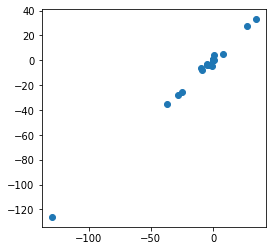

In [24]:
from matplotlib import pyplot as plt

plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.scatter(model.predict(X[0:1]), y[0])
plt.show()